In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats.mstats import kruskalwallis
from scipy.stats import wilcoxon
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
plt.rcParams['xtick.labelsize']=13
plt.rcParams['ytick.labelsize']=13
plt.rcParams['axes.labelsize']=16
plt.rcParams['axes.titlesize']=16

# $^{222}Rn$

In [2]:
EAM_Rn = [8.211480729123378, 9.208639915953292, 8.514089584350586, 8.322871674882604, 8.150424510874647, 8.526771139591299, 8.307480791781812, 8.621930791976604, 8.220381229481799, 8.403754741587537, 8.480089796350358, 8.563497624498732, 8.175465117109583, 8.29117425959161, 8.963435152743726, 8.061902472313415, 8.142905296163356, 8.604449779429334, 8.200639602985788, 8.299986981331035, 8.248483820164457, 8.127263779335834, 8.297681727307909, 8.25263940527084, 8.225357623810464]

# $^{222}Rn + T$

In [3]:
EAM_RnT_BCN = [8.059945654361806, 8.03970312564931, 8.12277168923236, 8.053294607933532, 8.048365126264857, 8.165090114512342, 8.02081221722542, 8.061697614953873, 8.185345507682637, 8.413906503230967, 8.132826094931744, 8.1881618093937, 8.251170665659803, 8.117733082872755, 8.350974224983378, 7.956330563159699, 8.038048358673745, 8.065417675261802, 8.0369804463488, 8.129734850944356, 8.102025661062687, 8.101720079462579, 8.135596863766933, 8.027808940156977, 8.28533558135337]
EAM_RnT_PMP = [8.048338423383997, 8.061835918020694, 8.010926185770238, 7.947391794082966, 8.436416666558449, 8.059653180710812, 8.212462526686648, 8.13142910409481, 8.318235965485268, 8.11553975369068, 8.016166605847948, 8.170698084729784, 8.160849753846513, 8.226865322031873, 8.555549986819004, 8.194006899569898, 8.282557548360622, 8.095395757796917, 8.102666895440285, 8.380331404665684, 8.062647920973758, 8.130499251345372, 8.203159900421792, 8.082500985328187, 8.104652485948927]
EAM_RnT_ZGZ = [8.344254067603577, 8.07323772349256, 8.18323585834909, 8.246122157320062, 8.079329957353307, 8.133613464680124, 8.202599910979576, 8.189216451441988, 8.144079573610997, 8.356861033338182, 8.205509226372902, 8.233928761583693, 8.160559431035468, 8.25779160032881, 8.249153096625145, 8.072600141484687, 8.264818029200777, 8.10154943263277, 8.342795716955306, 8.31978436733814, 8.241368922781437, 8.261904817946414, 8.259412603175386, 8.172716952384786, 8.345493763051135]
EAM_RnT_HSC = [8.281530583158453, 8.28206115073346, 8.177005159093978, 8.052565513773168, 8.24305834668748, 8.182604972352372, 8.053872169332301, 8.083223383477394, 8.251345898242707, 8.172950541719477, 8.06568088937313, 8.290624862021588, 8.129040657205785, 8.125324898577752, 7.993029979949302, 8.35301245019791, 8.3312279315705, 8.177043387230407, 7.969878988063082, 8.030435237478702, 8.054201572499377, 8.09184658781011, 8.273422038301508, 8.114550732551738, 8.039057264936732]

In [4]:
X = [EAM_Rn, EAM_RnT_BCN, EAM_RnT_PMP, EAM_RnT_ZGZ, EAM_RnT_HSC]
lbl = ['Rn', 'Rn+T BCN', 'Rn+T PMP', 'Rn+T ZGZ', 'Rn+T HSC']

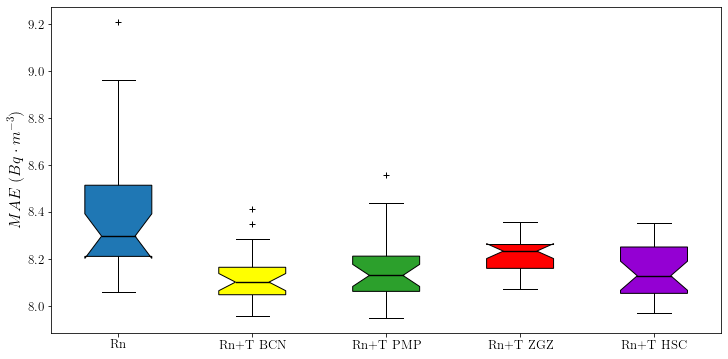

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
bplot = ax.boxplot(X, sym='+', labels=lbl, patch_artist=True, notch=True, 
                   medianprops=dict(linestyle='-', linewidth=1.4, color='k'))
plt.ylabel('$MAE\ (Bq \cdot m^{-3})$')
colors = ['#1f77b4', 'yellow', '#2ca02c', 'red', 'darkviolet']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
#fig.savefig('../Figures/CNN/MAE_Boxplot.png', dpi=300)

# Kruskal-Wallis
En estadística, la prueba de Kruskal-Wallis (de William Kruskal y W. Allen Wallis) es un método no paramétrico para probar si un grupo de datos proviene de la misma población. Intuitivamente, es idéntico al ANOVA con los datos reemplazados por categorías. Es una extensión de la prueba de la U de Mann-Whitney para 3 o más grupos.

Ya que es una prueba no paramétrica, la prueba de Kruskal-Wallis no asume normalidad en los datos, en oposición al tradicional ANOVA. Sí asume, bajo la hipótesis nula, que los datos vienen de la misma distribución. Una forma común en que se viola este supuesto es con datos heterocedásticos. 

In [6]:
print('Kruskal Wallis between BCN and PMP :', kruskalwallis(X[1], X[2]))
print('Kruskal Wallis between BCN and ZGZ :', kruskalwallis(X[1], X[3]))
print('Kruskal Wallis between BCN and HSC :', kruskalwallis(X[1], X[4]))

Kruskal Wallis between BCN and PMP : KruskalResult(statistic=1.2017882352940887, pvalue=0.27296456041325035)
Kruskal Wallis between BCN and ZGZ : KruskalResult(statistic=11.33261176470586, pvalue=0.0007615771424191868)
Kruskal Wallis between BCN and HSC : KruskalResult(statistic=0.9984941176470556, pvalue=0.31767516186993683)


In [7]:
print('Kruskal Wallis between PMP and ZGZ :', kruskalwallis(X[2], X[3]))
print('Kruskal Wallis between PMP and HSC :', kruskalwallis(X[2], X[4]))

Kruskal Wallis between PMP and ZGZ : KruskalResult(statistic=4.764705882352928, pvalue=0.029049022161940746)
Kruskal Wallis between PMP and HSC : KruskalResult(statistic=0.011388235294106153, pvalue=0.9150145467573126)


In [8]:
print('Kruskal Wallis between ZGZ and HSC :', kruskalwallis(X[3], X[4]))

Kruskal Wallis between ZGZ and HSC : KruskalResult(statistic=4.350588235294111, pvalue=0.03699616569833828)


In [9]:
print('Kruskal Wallis between the 4 cities :', kruskalwallis(X[:-1]))

Kruskal Wallis between the 4 cities : KruskalResult(statistic=28.093259405940614, pvalue=3.471958694804895e-06)


# V2

In [2]:
EAM_Rn = [7.957026462928922, 8.829230102838254, 8.82228993434532, 6.7291641609341495, 6.484147202734854, 5.728721543854358, 5.414373622221105, 7.374995474721871, 6.4537142959295535, 6.119189168892655, 6.428095163083544, 6.986444211473652, 6.054645800123028, 6.072771857766544, 6.662684571509268, 6.567270914713542, 5.728116802140778, 7.062237459070542, 5.830522238039503, 6.155300514370787, 5.328276391122856, 7.665476742912741, 5.856595768648035, 5.921784008250517, 5.988234950046913]

In [3]:
EAM_RnT_BCN = [6.640592799467199, 6.752361484602386, 6.566429212981579, 6.554271884993011, 6.9334148332184435, 6.43499542685116, 6.239002003389246, 6.307730356852214, 7.460333805458219, 6.3705578972311585, 7.211331049601237, 6.353525273940143, 7.63083719739727, 5.979975868673885, 7.167679132199755, 6.882324742335899, 6.720657124238856, 7.014494091856713, 6.546930761898265, 5.959228889614928, 7.437941644705978, 7.236246333402746, 8.616805506687538, 6.123318990071614, 6.908850838156307]
EAM_RnT_PMP = [6.476646572935815, 7.264290716133866, 6.505566802679324, 6.383237389957204, 6.750935573203891, 7.284977520213408, 5.924745447495404, 6.889391469020469, 6.627223033531039, 6.254274480483112, 6.670552571614583, 7.322537553076651, 6.574525010352041, 6.420104419483858, 6.96022071090399, 7.448443244485294, 6.677722930908203, 7.0180017059924555, 6.923133401309743, 7.26979969997032, 6.111400604248047, 8.436556348613664, 6.069889106002509, 6.6524842954149435, 6.3160067539589075]
EAM_RnT_ZGZ = [6.371614680570715, 7.137910768097522, 6.813130210427677, 7.286964154710956, 6.670178993075502, 6.076452816233916, 6.731590009203144, 6.451763377470129, 6.157823899213006, 7.731760286817364, 6.461606792375153, 6.544927073459999, 6.903651256187289, 6.4203742906159045, 8.103279861749387, 6.691247117285635, 7.099449008118873, 6.493941250969382, 5.922455581964231, 6.738455080518536, 6.706917183071959, 5.8234495649150775, 6.682252996108112, 6.471171696980794, 6.505207585353477]
EAM_RnT_HSC = [8.51159106983858, 6.356553208594229, 6.953885396321614, 6.330532859353458, 6.585010042377546, 6.8170348148719935, 6.678549074659161, 6.478125852697036, 6.39091895608341, 8.424645255593692, 6.427627675673541, 6.0703196432076245, 6.470955343807445, 6.181999917123832, 7.187143587598614, 7.406943040735581, 6.428633521584904, 6.136665830425188, 7.082850400139304, 6.28369888604856, 6.237776326198204, 6.5261895422841985, 7.044385087256338, 5.876008763032801, 6.137154223872166]

In [4]:
X = [EAM_Rn, EAM_RnT_BCN, EAM_RnT_PMP, EAM_RnT_ZGZ, EAM_RnT_HSC]
lbl = ['Rn', 'Rn+T BCN', 'Rn+T PMP', 'Rn+T ZGZ', 'Rn+T HSC']

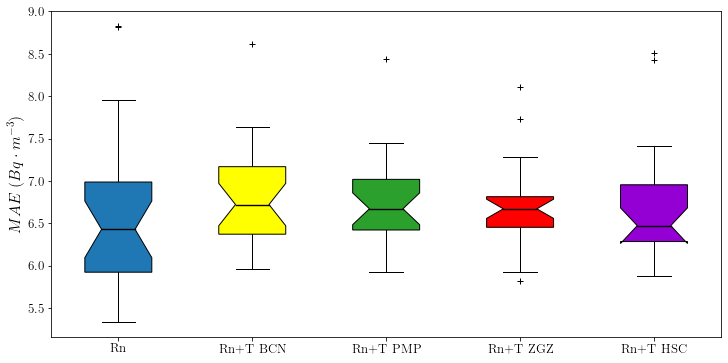

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
bplot = ax.boxplot(X, sym='+', labels=lbl, patch_artist=True, notch=True, 
                   medianprops=dict(linestyle='-', linewidth=1.4, color='k'))
plt.ylabel('$MAE\ (Bq \cdot m^{-3})$')
colors = ['#1f77b4', 'yellow', '#2ca02c', 'red', 'darkviolet']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
#fig.savefig('../Figures/CNN/MAE_Boxplot_v2.png', dpi=300)

In [6]:
print('Kruskal Wallis between BCN, PMP, HSC, ZGZ :', kruskalwallis(X[1], X[2], X[3], X[4]))

Kruskal Wallis between BCN, PMP, HSC, ZGZ : KruskalResult(statistic=1.9782178217821524, pvalue=0.576939964052124)


In [7]:
print('Wilcoxon between Rn and PMP', wilcoxon(X[0], X[2]))

Wilcoxon between Rn and PMP WilcoxonResult(statistic=94.0, pvalue=0.06531098743285503)


In [8]:
DF = pd.DataFrame({'Rn': EAM_Rn,
                  'BCN': EAM_RnT_BCN,
                  'PMP': EAM_RnT_PMP,
                  'ZGZ': EAM_RnT_ZGZ,
                  'HSC': EAM_RnT_HSC})

In [9]:
DF.describe()

,Rn,BCN,PMP,ZGZ,HSC
count,25.000000,25.000000,25.000000,25.000000,25.000000
mean,6.568852,6.801993,6.769307,6.679903,6.681008
std,0.945071,0.596355,0.542652,0.512125,0.656250
min,5.328276,5.959229,5.924745,5.823450,5.876009
25%,5.921784,6.370558,6.420104,6.451763,6.283699
50%,6.428095,6.720657,6.670553,6.670179,6.470955
75%,6.986444,7.167679,7.018002,6.813130,6.953885
max,8.829230,8.616806,8.436556,8.103280,8.511591


# 3 Forward

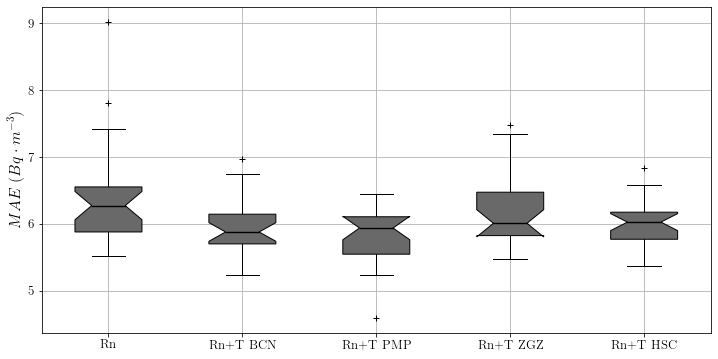

In [10]:
EAMRn =  [6.455543160438538, 7.072296301523845, 5.512895782788594, 6.013731161753337, 5.69798743724823, 7.423967639605205, 6.364539464314778, 6.2372556527455645, 6.473839322725932, 5.8800021807352705, 5.93059766292572, 7.802989721298218, 6.162115295728047, 5.541943788528442, 7.414313832918803, 6.553581555684407, 5.6810409228007, 5.992370208104451, 5.542460680007935, 6.526913444201152, 5.636475443840027, 6.901504993438721, 9.021165450414022, 6.334753394126892, 6.274289449055989]
EAM_BCN =  [6.16275954246521, 5.701338926951091, 5.853175123532613, 6.004204909006755, 5.4231016635894775, 6.746338407198588, 6.384002288182576, 5.861535906791687, 5.879589597384135, 5.776523272196452, 5.59281591574351, 6.045260588328044, 6.966628034909566, 6.346726099650065, 6.0387217203776045, 6.139764428138733, 5.813184499740601, 5.939867337544759, 5.598189036051433, 5.696633179982503, 5.33791979153951, 5.242201288541158, 5.7235389947891235, 6.566652894020081, 6.145748297373454]
EAM_PMP =  [6.171736081441243, 6.032948096593221, 6.2267671426137285, 4.585991024971008, 6.069047768910726, 5.547447760899861, 5.408446550369263, 6.440662860870361, 5.938269257545471, 6.103848417599996, 5.331648786862691, 5.238194584846497, 6.373743335405986, 5.51784360408783, 6.392698725064595, 6.356711149215698, 5.545058290163676, 5.684237281481425, 5.954345782597859, 6.107104063034058, 5.698317170143127, 5.9570006132125854, 5.6505701541900635, 5.7907891273498535, 5.938798189163208]
EAM_ZGZ =  [5.578525900840759, 5.761840144793193, 7.172967553138733, 6.152630845705668, 7.4824966589609785, 5.977097352345784, 5.487711985905965, 5.622631867726644, 5.825459241867065, 6.755466143290202, 6.267374952634175, 6.515908757845561, 5.8914981285731, 5.482475479443868, 7.341012318929036, 6.474547028541565, 6.371235688527425, 5.8407972653706866, 5.842097957928975, 5.589353879292806, 6.009651740392049, 6.356587092081706, 5.969763000806172, 6.107420245806376, 6.880016803741455]
EAM_HSC =  [6.583736300468445, 6.8315335512161255, 5.941060423851013, 6.273655613263448, 5.631256262461345, 5.444688558578491, 6.097360412279765, 6.071695446968079, 6.005175630251567, 5.371678511301677, 6.4383284250895185, 6.076025525728862, 5.479027152061462, 6.510177731513977, 6.027319272359212, 6.199570616086324, 6.122778534889221, 5.7268762191136675, 5.845083475112915, 6.002572337786357, 6.0272230704625445, 5.770824631055196, 5.916007041931152, 5.7001872062683105, 6.175832788149516]
# Boxplot:
X = [EAMRn, EAM_BCN, EAM_PMP, EAM_ZGZ, EAM_HSC]
lbl = ['Rn', 'Rn+T BCN', 'Rn+T PMP', 'Rn+T ZGZ', 'Rn+T HSC']
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
bplot = ax.boxplot(X, sym='+', labels=lbl, notch=True, patch_artist=True,
                   medianprops=dict(linestyle='-', linewidth=1.4, color='k'))
plt.grid()
plt.ylabel('$MAE\ (Bq \cdot m^{-3})$')
colors = ['dimgray']*5
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

In [19]:
print('Kruskal Wallis between Rn, BCN, PMP:', kruskalwallis(X[0], X[1], X[2]))

Kruskal Wallis between Rn, BCN, PMP: KruskalResult(statistic=7.346694736842096, pvalue=0.02539133338691291)


In [20]:
np.quantile(EAMRn, 0.25)

5.8800021807352705

In [11]:
print('Wilcoxon between Rn and PMP', wilcoxon(X[0], X[2]))
print('Wilcoxon between Rn and BCN', wilcoxon(X[0], X[1]))

Wilcoxon between Rn and PMP WilcoxonResult(statistic=60.0, pvalue=0.005816358945786271)
Wilcoxon between Rn and BCN WilcoxonResult(statistic=71.0, pvalue=0.013817143683192262)


In [12]:
DF = pd.DataFrame({'Rn': EAMRn,
                  'BCN': EAM_BCN,
                  'PMP': EAM_PMP,
                  'ZGZ': EAM_ZGZ,
                  'HSC': EAM_HSC})

In [13]:
DF.describe()

,Rn,BCN,PMP,ZGZ,HSC
count,25.000000,25.000000,25.000000,25.000000,25.000000
mean,6.417943,5.959457,5.842489,6.190263,6.010787
std,0.827186,0.417528,0.432668,0.571711,0.355106
min,5.512896,5.242201,4.585991,5.482475,5.371679
25%,5.880002,5.701339,5.547448,5.825459,5.770825
50%,6.274289,5.879590,5.938798,6.009652,6.027223
75%,6.553582,6.145748,6.107104,6.474547,6.175833
max,9.021165,6.966628,6.440663,7.482497,6.831534


## To CSV

In [22]:
def ErrorToCSV(Rn, BCN, PMP, ZGZ, HSC, nFw):
    DF = pd.DataFrame({'Rn': Rn,
                  'BCN': BCN,
                  'PMP': PMP,
                  'ZGZ': ZGZ,
                  'HSC': HSC})
    DF.to_csv(f'~/CIEMAT/Rn_Time_Series/AEMET/logs/Errors{nFw}Fw.csv', index=False)

In [17]:
# 3 Fw
DF.to_csv('~/CIEMAT/Rn_Time_Series/AEMET/logs/Errors3Fw.csv', index=False)

In [23]:
# 1 Fw
EAMRn =  [9.149102921181537, 10.972279974754821, 9.157491846287504, 9.096090438518118, 8.82269538717067, 9.12053534325133, 9.990809055084878, 9.060302369138027, 9.080083725300241, 9.263091472869224, 9.334937521751892, 8.983358829579455, 9.1765837162099, 9.584409023853059, 11.152177445431972, 10.836099015905502, 10.002210048919029, 10.062781151304854, 8.88575330693671, 9.860891545072516, 9.227605210973861, 9.091266875571392, 9.226848237057949, 9.069253840345018, 10.893632726466402]
EAM_BCN =  [8.608441657208381, 8.520069609297083, 10.4312744140625, 8.830770776626911, 9.537652644705265, 8.866034771533723, 10.783433102546855, 9.515131280777302, 9.49988624897409, 8.437074661254883, 8.979029959820686, 8.844516916477934, 9.264341679025204, 8.460104759703292, 8.685753599126288, 9.710603145842857, 8.704015407156437, 10.455260418831035, 8.68532091505984, 8.895841233273769, 10.316534975741773, 10.511978879888007, 8.777139541950632, 11.488992082311752, 9.149299459254488]
EAM_PMP =  [8.918975627168695, 9.73511902829434, 12.335933117156333, 9.081247045638714, 8.677834571676051, 8.584602396538918, 10.829312304232984, 8.546287414875437, 8.772279982871197, 9.716838430851064, 10.766838276639898, 9.567322386072037, 7.911278663797582, 9.495645928890147, 8.780070528070977, 10.380225567107505, 9.272437521751892, 8.622498126740151, 9.143226380043842, 9.20304984234749, 8.97000174826764, 11.101498867603059, 10.085637275208818, 8.988374466591694, 9.038940835506358]
EAM_ZGZ =  [8.624775825662816, 9.163332472456263, 10.21683469731757, 8.200508361167095, 9.459241623574115, 8.854229054552443, 9.912652482377721, 8.229460411883416, 9.206362014121197, 9.917038369686045, 8.674690977055976, 9.670827013380984, 9.753449054474526, 8.771835935876725, 8.906670915319564, 8.367794239774664, 8.771316203665226, 10.101122267702793, 9.160643151465882, 9.223457498753325, 8.353501015521111, 10.277178581724776, 9.003224393154712, 10.194418805710812, 8.812273350167782]
EAM_HSC =  [9.048328196748773, 8.537218824346015, 8.985657955737825, 8.652533551479907, 10.474191340994327, 9.304891423976168, 8.81002259761729, 11.24164930303046, 9.10052664736484, 8.722430655296813, 7.934396703192529, 9.506304193050303, 10.502271408730365, 9.277792342165684, 10.579531486998214, 8.73671937496104, 10.49694118093937, 10.178348297768451, 9.090319126210314, 9.7366431621795, 10.54396803835605, 10.147841920243932, 8.839026146746697, 9.408654070915059, 9.875777914168987]
ErrorToCSV(EAMRn, EAM_BCN, EAM_PMP, EAM_ZGZ, EAM_HSC, nFw=1)

In [24]:
# 2 Fw
EAMRn =  [6.234849869577508, 7.098490785297595, 6.356401463558799, 6.455148716976768, 6.9622120104338, 5.988287915681537, 6.229835189016241, 5.804980789987664, 6.071309420936986, 6.874853475470292, 6.215179644132915, 7.554827077765214, 6.017591978374281, 6.127747264661287, 7.226497047825863, 6.376475083200555, 6.416086016203228, 6.220655421206826, 6.227477344713713, 6.397734230443051, 6.082034181293689, 5.776244555021587, 5.587605325799239, 5.345387830232319, 8.482636782997533]
EAM_BCN =  [6.442244921232525, 6.475963994076378, 6.20122588308234, 6.616972391228927, 6.229546677438837, 6.624561390123869, 6.876308240388569, 6.655519626015111, 7.138307350560239, 7.275475431743421, 5.620283227217825, 6.8115701374254725, 5.832100998727899, 5.7016848513954566, 6.9235176889519945, 6.59429000051398, 7.230398238332648, 6.4222861440558185, 6.004094816509046, 5.835083248740748, 6.827094790810033, 6.5852415787546255, 6.311400805021587, 8.316439297324733, 5.4898527446546055]
EAM_PMP =  [6.809526262785259, 5.993946035284745, 8.277984779759457, 6.344630311664782, 7.061686987625925, 6.7234658090691815, 6.131199083830181, 6.485319759971217, 6.086057683041221, 5.73606226067794, 6.017669035259046, 6.391634931062397, 6.875666929546155, 6.053906169690584, 5.791304497969778, 6.4860993234734785, 5.8545435052169, 6.327548539011102, 6.3601235640676395, 5.6211388035824426, 5.568829265393709, 7.134237108732525, 6.827983334189967, 6.135324417917352, 6.202594957853618]
EAM_ZGZ =  [5.759231125681024, 6.983904989142167, 7.098075746235095, 6.134911747982628, 8.965967479505037, 5.985147054571854, 7.076320848966899, 5.832204075863487, 6.006817466334293, 6.091441184596012, 7.53714639764083, 7.042880730879935, 6.74027408800627, 7.314007367585835, 6.4991394846062915, 6.701567318564967, 7.924039097836143, 6.319877102500514, 5.791514386628803, 6.848756047299034, 5.518479036030016, 5.649868975187603, 6.887576414409437, 5.375799640856291, 6.161323788291529]
EAM_HSC =  [6.915558664422286, 6.683347601639597, 6.65749676353053, 5.750851400274979, 6.309807827598171, 5.041974439119038, 7.940581151058799, 5.899963900917455, 5.793440567819696, 5.815549348530016, 6.332632566753187, 5.845693367405942, 6.5185809486790705, 7.649516135767887, 7.10131566900956, 6.442905626798931, 6.221017335590563, 5.760620679353413, 5.832343292236328, 6.629415050305818, 7.0625956886693055, 5.775348221628289, 5.693285771420127, 5.292702363666735, 7.871275731136924]
ErrorToCSV(EAMRn, EAM_BCN, EAM_PMP, EAM_ZGZ, EAM_HSC, nFw=2)

In [25]:
# 4 Fw
EAMRn =  [5.418604310025874, 5.397494994487959, 6.497712872691991, 6.205331074822809, 7.167073357965529, 6.0683941791967015, 5.0952713170002415, 5.356288241356919, 6.910896261942756, 5.326682218571299, 5.247653685894209, 6.486608406932084, 6.342934834588434, 6.1595252912069105, 7.057683217156794, 5.596890950940319, 5.62854342116523, 6.351183822474529, 6.17150017649857, 6.440964649633034, 5.422526723330783, 5.678198077015041, 6.960509310063627, 5.968875373761678, 7.193016445513853]
EAM_BCN =  [6.588674053703387, 6.144554688758457, 6.207972339748108, 5.39733316480499, 5.8433725022778065, 5.539403895741885, 5.833551583830843, 6.229884000168633, 5.7092834158042045, 6.374688807222032, 6.176630079131765, 5.424618278582072, 5.641063690185547, 6.014205224735221, 5.637552870917566, 6.085070580551305, 7.507348994618838, 6.1886642298747585, 7.28226592860271, 6.061749566461622, 5.371671499665251, 6.119210154739852, 5.988004153536767, 5.96866981270387, 5.506984199445272]
EAM_PMP =  [6.307621002197266, 6.90428759388088, 8.116263006151337, 6.197019714670083, 6.103512360877597, 6.095841161983529, 6.2356323556801705, 5.605464070113664, 5.475973345569728, 6.054848385840347, 6.992632207182265, 5.5189506294801065, 5.66999848355952, 5.610873979391511, 5.714242954844052, 5.781051950356395, 5.937352760550902, 6.069333499239892, 6.305858022158908, 5.460622492524767, 6.299455229769048, 5.294999820669902, 6.177380984591455, 5.431980093729865, 5.963474234354865]
EAM_ZGZ =  [7.878065561510853, 6.223337429085958, 6.044030848237657, 5.68538524195091, 5.6533593639885025, 5.8534995403486425, 5.564506570088494, 6.109157562255859, 7.327654887720482, 5.636294610721549, 5.9420473551012805, 5.24126587700598, 5.522802923143525, 5.930286682758135, 6.150922912912271, 6.197885218354845, 5.403859482598059, 6.342643541159089, 5.209541714068541, 6.701360643524485, 5.867689702928681, 5.78772098501933, 6.344794047247503, 5.604996828688789, 6.3017996168628185]
EAM_HSC =  [6.024983396235201, 5.756064975384584, 5.486682183963737, 6.119357669476381, 6.263884947472012, 6.840844026545889, 5.92366417167113, 5.950886952508356, 6.525836590639095, 6.014734641792848, 6.844309698675096, 5.562778708861046, 6.483219815283706, 5.924842598512001, 6.38173195750443, 5.585165633368738, 6.3057374069371175, 5.740139204202239, 6.088530039049916, 5.474312103900713, 5.440623371871476, 5.913354342745752, 7.509663650670002, 6.448120235167828, 5.868033222316467]
ErrorToCSV(EAMRn, EAM_BCN, EAM_PMP, EAM_ZGZ, EAM_HSC, nFw=4)

In [26]:
# 5 Fw
EAMRn =  [6.0388045019033, 5.8796358303147915, 5.4355607324717, 6.291724925138513, 6.2576039372658245, 5.552841303299885, 5.72919935109664, 6.5026631647226765, 5.323442264479034, 5.87598890187789, 6.054384465120276, 4.824274530216139, 4.76371617219886, 6.610461449136539, 5.602090134912608, 5.986272578336755, 5.743023930763711, 5.509295911205058, 6.933863386815908, 5.857911907896703, 5.18718299087213, 5.3284633402921715, 6.374315145064373, 5.721179767530792, 5.731950759887695]
EAM_BCN =  [5.841507619741011, 6.494560475252112, 5.991169442935866, 5.3099448534907125, 5.5067049532520524, 5.24415584486358, 6.098319890547772, 6.074115091440629, 5.6936385096335895, 6.592449849965621, 6.658405498582489, 6.1026371157899195, 6.05432467557946, 5.744691887680365, 6.2773624731569875, 5.721792337845783, 6.95516418924137, 5.6521395079943595, 5.789252495279118, 5.490125500426, 5.645911002645687, 5.682678144805285, 5.553609731246014, 7.142091906800562, 5.705052784511021]
EAM_PMP =  [6.222283849910814, 6.088368396369779, 5.989478909239477, 6.227297140627491, 6.021387372698102, 5.906428551187321, 6.043572211752132, 5.833752184498067, 6.401992175043846, 5.773003403021365, 6.477028048768336, 5.340389407410914, 5.847680305948063, 6.187764459726762, 5.185361356151347, 5.869581183608697, 5.954702571946747, 6.5108359979123485, 6.475868770054409, 6.12918826511928, 5.2642073728600325, 5.74742484579281, 5.425031817689234, 5.628776199963628, 5.496837538115832]
EAM_ZGZ =  [6.597640368403221, 5.690122292966259, 5.685162213383888, 5.854494289476044, 5.97024392108528, 5.298223729036292, 5.6153261612872685, 5.7388374951421, 5.708856504790637, 6.186367307390485, 5.657204881006358, 6.056342494731047, 5.48471890663614, 5.840221327178332, 5.62105147692622, 5.779281032328703, 5.472495993789361, 6.129297840351961, 5.549182074410575, 5.972467500336316, 5.960614963453644, 5.451028123193858, 6.05630247933524, 6.012967401621293, 6.525303470845125]
EAM_HSC =  [7.328170698516223, 5.7496132364078445, 6.495539100802675, 5.129196478396046, 5.801801642593072, 5.6420243321632855, 6.781983356086576, 5.695901092217893, 5.734931945800781, 5.8178236825125555, 5.909621452798649, 5.937380070589026, 6.666411964260802, 5.7827730373460415, 6.5266770343391265, 5.419647995306521, 5.877196175711496, 5.067497603747309, 6.448573871534698, 6.93081030553701, 6.249518452858438, 5.697031682851363, 5.525543757847378, 5.472242277495715, 5.596459252493722]
ErrorToCSV(EAMRn, EAM_BCN, EAM_PMP, EAM_ZGZ, EAM_HSC, nFw=5)

In [27]:
# 6 Fw
EAMRn =  [7.263378220375138, 5.914247609148122, 6.079490623088798, 5.543954136395695, 5.129480265607738, 5.621411371712733, 5.404475009802616, 6.802962023802478, 6.154993770098446, 5.021649909741951, 5.992336427322542, 5.470946841769749, 8.686711205376518, 7.3091131268125595, 6.491412345809166, 6.166844339081735, 5.566159951566446, 5.378551136363637, 5.941130975280145, 5.693633069895735, 4.893817400691485, 6.857236341996626, 6.4071582832721745, 5.518300104622889, 5.799864836413451]
EAM_BCN =  [5.769486668133976, 5.858945673162287, 6.248057278719815, 5.591377412429964, 5.980374153214272, 5.988064544369476, 5.920766888242779, 5.738340551202947, 5.972078766485657, 5.807519931985874, 5.834316716049656, 5.499816855998954, 6.458680393719914, 5.399156088780875, 6.131553726966935, 6.217387074171895, 6.674332512749566, 6.007066938612196, 5.6172594783282035, 6.297879036026772, 6.139528178205394, 5.867479343606968, 6.379509742813881, 6.20743741892805, 6.1726180953208845]
EAM_PMP =  [6.146223241632635, 5.782891051937836, 6.277752847382517, 5.49423880528922, 6.854937158449732, 6.532792640454842, 5.364422730725221, 5.584720457443083, 5.939285663643268, 7.3066234781284525, 8.234479576650292, 5.865218615291094, 5.886763062139954, 5.731525459674874, 5.454301044194385, 5.879805324053524, 5.648774927312678, 5.206398472641453, 5.858170403374566, 6.258102879379734, 5.928186166166055, 5.7961666608097575, 6.222717015430181, 6.1110662980513135, 6.0134684630114625]
EAM_ZGZ =  [6.035689960826527, 5.251244207825324, 6.839828722404711, 6.122843385946871, 6.397334012118253, 5.48154314599856, 5.629277470135929, 6.066271155771583, 5.9869333902994795, 5.845687557952573, 6.104573297982264, 5.964256363685685, 5.518555381081321, 6.0827232900291985, 5.644254896375868, 6.854693287550801, 5.56612689085681, 5.744480980767144, 5.5334033773402975, 5.688337114122179, 6.752186630711411, 5.8697804537686435, 6.401178571912977, 5.5700616547555635, 6.284138881798946]
EAM_HSC =  [6.862319252707741, 5.692544378415502, 6.268756750858191, 6.216941640834616, 6.034798323506057, 6.025237227931167, 5.654780108519275, 5.621447245279948, 6.615253063163372, 5.864120175140073, 5.896317183369338, 5.987690087520715, 5.973009552618469, 6.192178783994732, 5.674076889500474, 5.924785421352194, 6.248510379983921, 5.7252682001903805, 6.406176942767519, 6.4216318997469815, 4.8654049189403805, 5.540902262986308, 6.062009792135219, 6.1776642847542815, 5.992658865572226]
ErrorToCSV(EAMRn, EAM_BCN, EAM_PMP, EAM_ZGZ, EAM_HSC, nFw=6)

In [28]:
# 7 Fw
EAMRn =  [5.945340919494629, 7.810002861022949, 6.169932136535644, 5.2501313018798825, 5.203550529479981, 6.336508903503418, 5.966089820861816, 5.389741592407226, 5.470204696655274, 6.628559646606445, 6.551792945861816, 5.616622314453125, 5.4321987915039065, 6.992270393371582, 5.225708274841309, 6.130649223327636, 5.693145790100098, 6.133560905456543, 5.911983184814453, 5.553126564025879, 5.044388236999512, 5.490315780639649, 7.164781150817871, 5.876118049621582, 5.973681297302246]
EAM_BCN =  [6.48404712677002, 6.011630821228027, 5.976612663269043, 5.609137802124024, 6.2849183273315425, 6.723846702575684, 5.776564865112305, 5.291051940917969, 5.056334114074707, 6.232413291931152, 6.465879783630371, 5.567908592224121, 6.273289756774902, 6.606771354675293, 5.87333740234375, 5.627171669006348, 6.354940948486328, 5.916684608459473, 5.5884805679321286, 7.166236457824707, 5.731785278320313, 5.835553436279297, 7.281491813659668, 6.121661834716797, 6.166247673034668]
EAM_PMP =  [5.760578918457031, 5.7640877532958985, 5.3892678451538085, 6.183608093261719, 5.915149154663086, 5.794028930664062, 6.740579948425293, 5.326535415649414, 7.058362579345703, 5.904839057922363, 6.9913202667236325, 5.875280647277832, 5.526207237243653, 5.812371101379394, 7.283575286865235, 5.91616943359375, 5.9970472717285155, 5.735780982971192, 5.627660942077637, 5.768128433227539, 5.85992057800293, 5.402605476379395, 6.490283126831055, 5.695566635131836, 6.576252861022949]
EAM_ZGZ =  [5.762485733032227, 5.793597145080566, 5.739544296264649, 6.066185722351074, 5.526341552734375, 5.597003364562989, 5.920810661315918, 5.479183349609375, 6.593405227661133, 5.6574241638183596, 5.863083152770996, 6.2807621383667, 5.933485145568848, 5.777196235656739, 5.906195602416992, 6.2371338272094725, 4.9313834762573245, 5.511401481628418, 6.83504638671875, 5.790550308227539, 6.554671745300293, 5.882109489440918, 5.765636711120606, 5.257373962402344, 5.833701057434082]
EAM_HSC =  [5.249049835205078, 5.993952865600586, 6.368607292175293, 5.192638130187988, 5.996007957458496, 7.0333642578125, 5.5921421813964844, 5.367033576965332, 6.298281478881836, 6.541243476867676, 6.074956016540527, 5.7441322708129885, 6.144819869995117, 6.259776420593262, 5.749076919555664, 6.191373138427735, 5.47500358581543, 6.864494247436523, 6.2691075897216795, 5.810977478027343, 6.171767578125, 5.564887237548828, 5.581961250305175, 5.707903938293457, 6.876003456115723]
ErrorToCSV(EAMRn, EAM_BCN, EAM_PMP, EAM_ZGZ, EAM_HSC, nFw=7)

In [29]:
# 9 Fw
EAMRn = [8.211480729123378, 9.208639915953292, 8.514089584350586, 8.322871674882604, 8.150424510874647, 8.526771139591299, 8.307480791781812, 8.621930791976604, 8.220381229481799, 8.403754741587537, 8.480089796350358, 8.563497624498732, 8.175465117109583, 8.29117425959161, 8.963435152743726, 8.061902472313415, 8.142905296163356, 8.604449779429334, 8.200639602985788, 8.299986981331035, 8.248483820164457, 8.127263779335834, 8.297681727307909, 8.25263940527084, 8.225357623810464]
EAM_BCN = [8.059945654361806, 8.03970312564931, 8.12277168923236, 8.053294607933532, 8.048365126264857, 8.165090114512342, 8.02081221722542, 8.061697614953873, 8.185345507682637, 8.413906503230967, 8.132826094931744, 8.1881618093937, 8.251170665659803, 8.117733082872755, 8.350974224983378, 7.956330563159699, 8.038048358673745, 8.065417675261802, 8.0369804463488, 8.129734850944356, 8.102025661062687, 8.101720079462579, 8.135596863766933, 8.027808940156977, 8.28533558135337]
EAM_PMP = [8.048338423383997, 8.061835918020694, 8.010926185770238, 7.947391794082966, 8.436416666558449, 8.059653180710812, 8.212462526686648, 8.13142910409481, 8.318235965485268, 8.11553975369068, 8.016166605847948, 8.170698084729784, 8.160849753846513, 8.226865322031873, 8.555549986819004, 8.194006899569898, 8.282557548360622, 8.095395757796917, 8.102666895440285, 8.380331404665684, 8.062647920973758, 8.130499251345372, 8.203159900421792, 8.082500985328187, 8.104652485948927]
EAM_ZGZ = [8.344254067603577, 8.07323772349256, 8.18323585834909, 8.246122157320062, 8.079329957353307, 8.133613464680124, 8.202599910979576, 8.189216451441988, 8.144079573610997, 8.356861033338182, 8.205509226372902, 8.233928761583693, 8.160559431035468, 8.25779160032881, 8.249153096625145, 8.072600141484687, 8.264818029200777, 8.10154943263277, 8.342795716955306, 8.31978436733814, 8.241368922781437, 8.261904817946414, 8.259412603175386, 8.172716952384786, 8.345493763051135]
EAM_HSC = [8.281530583158453, 8.28206115073346, 8.177005159093978, 8.052565513773168, 8.24305834668748, 8.182604972352372, 8.053872169332301, 8.083223383477394, 8.251345898242707, 8.172950541719477, 8.06568088937313, 8.290624862021588, 8.129040657205785, 8.125324898577752, 7.993029979949302, 8.35301245019791, 8.3312279315705, 8.177043387230407, 7.969878988063082, 8.030435237478702, 8.054201572499377, 8.09184658781011, 8.273422038301508, 8.114550732551738, 8.039057264936732]
ErrorToCSV(EAMRn, EAM_BCN, EAM_PMP, EAM_ZGZ, EAM_HSC, nFw=9)